In [ ]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

import os
from google.colab import drive
import numpy as np # linear algebra
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras. models import Sequential
# from kerasilayers import Conv2D, Dropout, Dense, Flatten, Conv2DTranspose, BatchNo
import tensorflow as tf
import warnings
warnings. filterwarnings ('ignore')


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls /content/
!rm -r /content/celeba-dataset
!mkdir -p /content/celeba-dataset
!unzip celeba-dataset.zip -d /content/celeba-dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: /content/celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: /content/cel

In [ ]:
import os


all_image_path = []


full_image_train = '/content/celeba-dataset/img_align_celeba/img_align_celeba'


for path in os.listdir(full_image_train):
    if path.endswith('.jpg'):
        all_image_path.append(os.path.join(full_image_train, path))


image_path_50k = all_image_path[0:20000]


print(len(image_path_50k))


20000


In [ ]:
cropping_box = (30, 55, 150, 175)
training_images = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in image_path_50k]

for i in range(len(training_images)):
  training_images[i] = (training_images[i] - training_images[i].min()) / (255 - training_images[i].min())


training_images = np.array(training_images)

print(training_images) ##all values between zero and one
print(training_images.shape)

[[[[0.33333333 0.24279835 0.19753086]
   [0.34156379 0.25102881 0.20164609]
   [0.3744856  0.29218107 0.24691358]
   ...
   [0.25102881 0.20987654 0.18930041]
   [0.218107   0.17695473 0.14814815]
   [0.16049383 0.11934156 0.08230453]]

  [[0.33744856 0.24691358 0.20164609]
   [0.35390947 0.26337449 0.21399177]
   [0.34156379 0.26337449 0.20987654]
   ...
   [0.25102881 0.20987654 0.18930041]
   [0.218107   0.18106996 0.15226337]
   [0.16460905 0.12345679 0.08641975]]

  [[0.32098765 0.23045267 0.18518519]
   [0.35802469 0.26337449 0.20987654]
   [0.32098765 0.24279835 0.18518519]
   ...
   [0.25102881 0.21399177 0.18930041]
   [0.22222222 0.18518519 0.15226337]
   [0.16460905 0.12345679 0.08641975]]

  ...

  [[0.19341564 0.12757202 0.09876543]
   [0.17695473 0.11934156 0.09876543]
   [0.18518519 0.12757202 0.10699588]
   ...
   [0.3744856  0.33744856 0.30041152]
   [0.4691358  0.44032922 0.40329218]
   [0.49382716 0.47736626 0.44855967]]

  [[0.19753086 0.13168724 0.10288066]
   [0.1

In [ ]:
print(training_images.shape)

(20000, 64, 64, 3)


<Figure size 1000x1000 with 0 Axes>

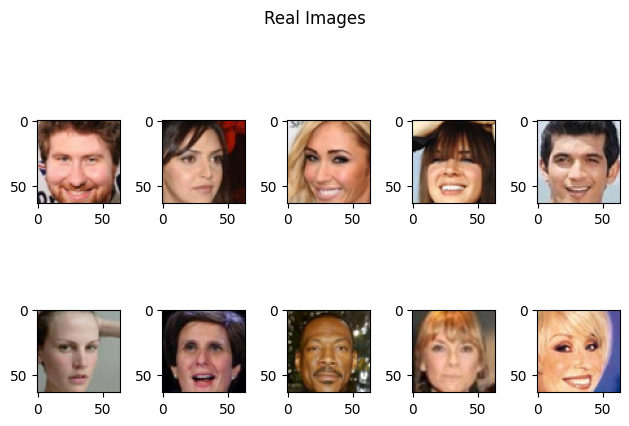

In [ ]:
plt.figure(figsize = (10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle ("Real Images")
idx=8
for i in range (2):
    for j in range (5):
      ax[i,j].imshow(training_images[idx].reshape (64,64,3))
      idx+=6

plt.tight_layout()
plt.show()

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(training_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

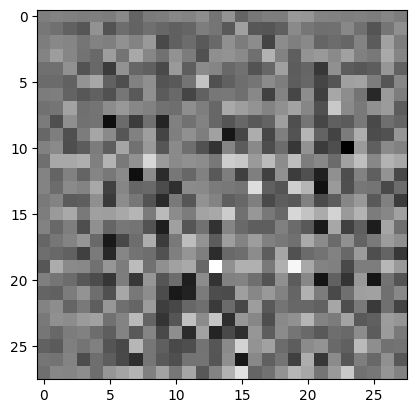

In [ ]:
generator = make_generator_model()
print(generator.summary())
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
discriminator.summary()
decision = discriminator(generated_image)
print(decision)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
GAN = Sequential ([generator , discriminator])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile (optimizer= 'adam', loss='binary_crossentropy')
GAN.layers
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         2330944   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 2543809 (9.70 MB)
Trainable params: 2305472 (8.79 MB)
Non-trainable params: 238337 (931.00 KB)
_________________________________________________________________


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

##Prepare Training

In [ ]:
EPOCHS = 25
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    images = tf.image.resize(images, (28, 28))  # Resize to 28x28
    images = tf.image.rgb_to_grayscale(images)
    noise = tf.random.normal([BATCH_SIZE, noise_dim])


    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss, real_loss, fake_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, real_loss, fake_loss

In [ ]:
def train(dataset, epochs):
  gen_hist = []
  disc_hist = []
  disc_real_hist = []
  disc_fake_hist = []
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      g_loss, d_loss, d_real_loss, d_fake_loss = train_step(image_batch)
      g_loss = g_loss.numpy()
      d_loss = d_loss.numpy()
      d_real_loss = d_real_loss.numpy()
      d_fake_loss = d_fake_loss.numpy()
      gen_hist.append(g_loss)
      disc_hist.append(d_loss)
      disc_real_hist.append(d_real_loss)
      disc_fake_hist.append(d_fake_loss)
    print("G_loss:", g_loss, "D_loss:", d_real_loss, d_fake_loss, d_loss)


    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  # display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
  plot_history(disc_real_hist, disc_fake_hist, disc_hist, gen_hist)

In [ ]:
def generate_and_save_images(model, epoch, test_input):

  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
def plot_history(d1_hist, d2_hist, d_hist, g_hist):
  # plot loss
  plt.plot(d1_hist, label='d-real')
  plt.plot(d2_hist, label='d-fake')
  plt.plot(d_hist, label='d-total')
  plt.plot(g_hist, label='gen')
  plt.legend()
  # save plot to file
  plt.savefig('plot_loss.png')
  plt.show()
  plt.close()

##Training

G_loss: 0.30233395 D_loss: 0.6904739 1.3460646 2.0365386


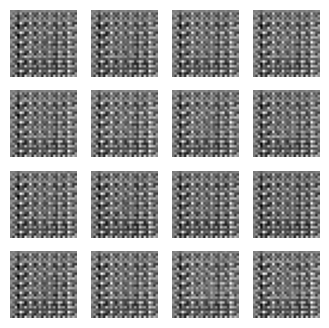

Time for epoch 1 is 14.369256258010864 sec
G_loss: 0.23270184 D_loss: 0.6958536 1.5755585 2.2714121


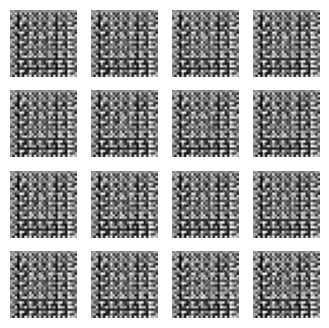

Time for epoch 2 is 3.8115742206573486 sec
G_loss: 0.19670467 D_loss: 0.6929225 1.7260859 2.4190083


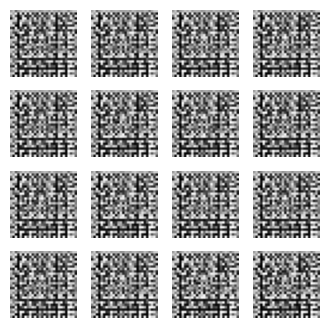

Time for epoch 3 is 3.8258261680603027 sec
G_loss: 0.17913118 D_loss: 0.6950216 1.8118119 2.5068336


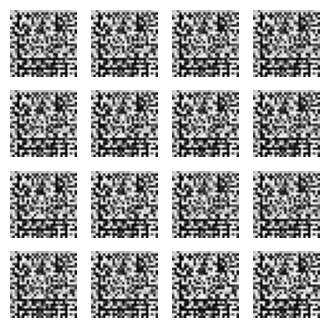

Time for epoch 4 is 3.6395297050476074 sec
G_loss: 0.17166783 D_loss: 0.6919084 1.8512782 2.5431867


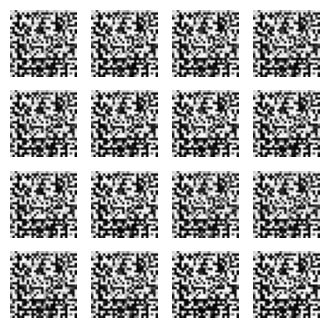

Time for epoch 5 is 4.126940488815308 sec
G_loss: 0.1628363 D_loss: 0.6914828 1.898974 2.5904567


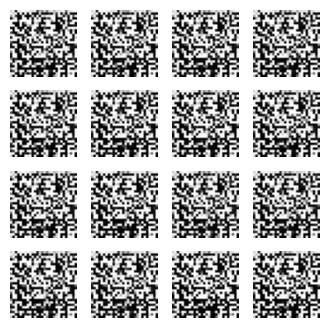

Time for epoch 6 is 5.715551376342773 sec
G_loss: 0.16051319 D_loss: 0.68700564 1.9129733 2.599979


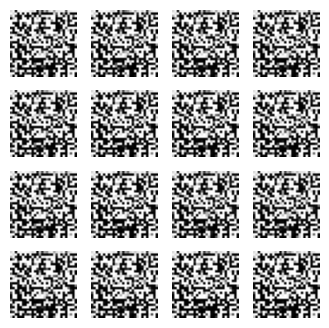

Time for epoch 7 is 3.7854559421539307 sec
G_loss: 0.1594322 D_loss: 0.69152486 1.9184151 2.60994


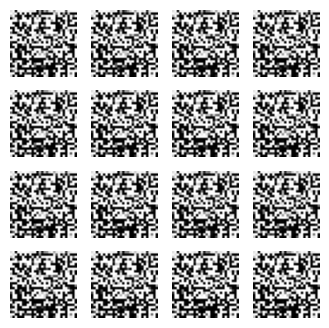

Time for epoch 8 is 6.013656854629517 sec
G_loss: 0.15816218 D_loss: 0.6867532 1.9263198 2.613073


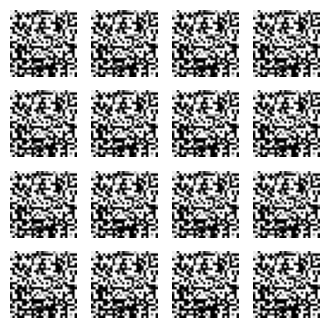

Time for epoch 9 is 4.295604705810547 sec
G_loss: 0.15620951 D_loss: 0.69444716 1.9378363 2.6322834


Time for epoch 10 is 3.797727346420288 sec
G_loss: 0.15650034 D_loss: 0.6899774 1.9364467 2.626424


Time for epoch 11 is 3.724731206893921 sec
G_loss: 0.15577957 D_loss: 0.6933665 1.9408681 2.6342347


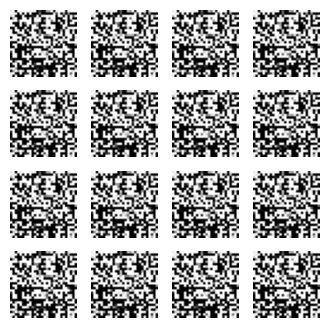

Time for epoch 12 is 5.7324323654174805 sec
G_loss: 0.1557946 D_loss: 0.6890057 1.9402691 2.6292748


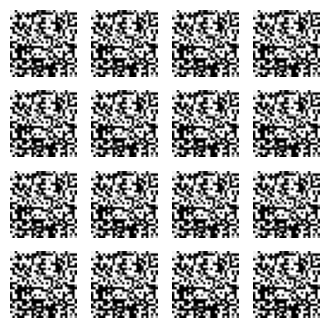

Time for epoch 13 is 3.884719133377075 sec
G_loss: 0.15486833 D_loss: 0.69386935 1.9463599 2.6402292


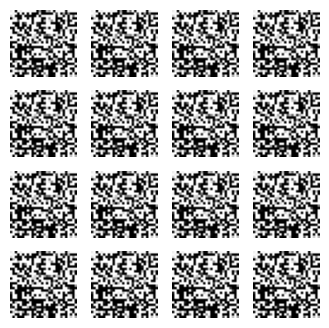

Time for epoch 14 is 4.44951605796814 sec
G_loss: 0.15278736 D_loss: 0.68876034 1.9580753 2.6468356


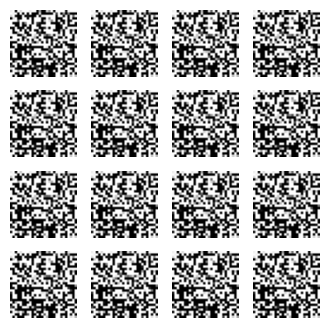

Time for epoch 15 is 4.1400275230407715 sec
G_loss: 0.15261069 D_loss: 0.69370914 1.9602014 2.6539106


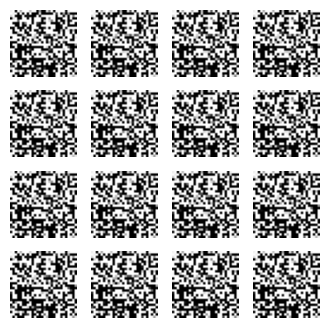

Time for epoch 16 is 3.783993721008301 sec
G_loss: 0.15231292 D_loss: 0.6856058 1.9618887 2.6474946


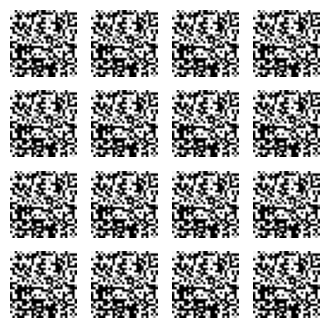

Time for epoch 17 is 3.766679525375366 sec
G_loss: 0.15342107 D_loss: 0.6840265 1.9547713 2.6387978


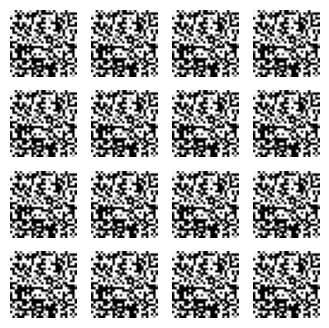

Time for epoch 18 is 6.068313837051392 sec
G_loss: 0.15059915 D_loss: 0.6835131 1.9725227 2.656036


Time for epoch 19 is 3.996258020401001 sec
G_loss: 0.15161496 D_loss: 0.6983582 1.9657179 2.664076


Time for epoch 20 is 3.927802085876465 sec
G_loss: 0.15308759 D_loss: 0.69207996 1.957313 2.6493928


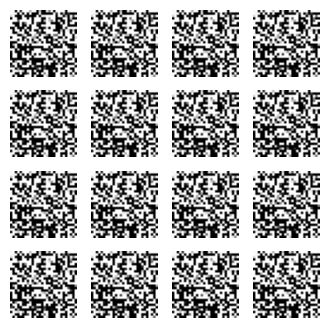

Time for epoch 21 is 3.9770421981811523 sec
G_loss: 0.15145577 D_loss: 0.69171995 1.9671298 2.6588497


Time for epoch 22 is 3.756944417953491 sec
G_loss: 0.15053675 D_loss: 0.6935556 1.9732258 2.6667814


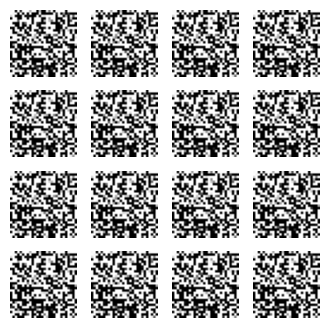

Time for epoch 23 is 4.204567193984985 sec
G_loss: 0.15134227 D_loss: 0.6909917 1.9675177 2.6585095


Time for epoch 24 is 5.741193532943726 sec
G_loss: 0.15230373 D_loss: 0.69906497 1.9612668 2.6603317


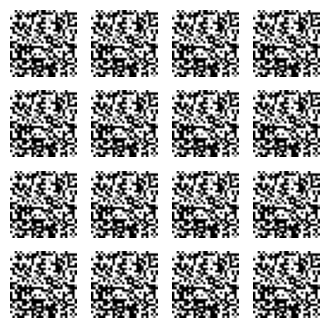

Time for epoch 25 is 4.005877494812012 sec


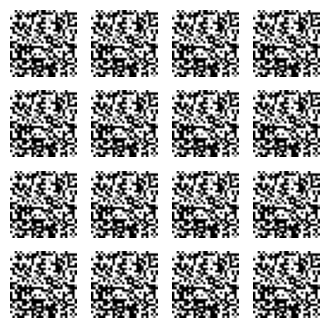

In [ ]:
train(train_dataset, EPOCHS)